In [5]:
import numpy as np
import matplotlib.pyplot as plt
a = np.random.randint(1,10,size=(5,8))
print(a)

[[1 1 2 2 2 1 5 7]
 [5 3 1 1 6 3 4 6]
 [6 1 5 1 1 7 4 1]
 [8 7 4 9 6 2 8 3]
 [6 6 3 7 5 7 1 2]]


In [6]:
image1=a


In [7]:
names = ['a','b','c','d','e','f','g','h']
classes = ['a','b','c','d','e']

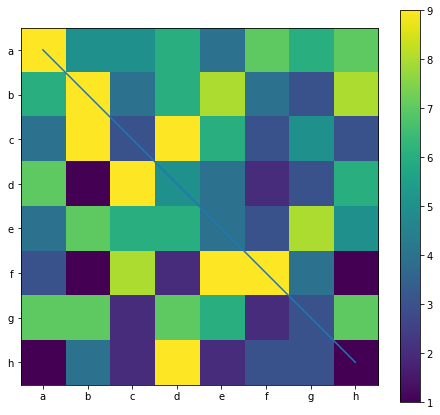

In [51]:
fig = plt.figure(figsize=(image1.shape[0],image1.shape[1]))
vmin, vmax = image1.min(),image1.max()
fig = plt.imshow(image1, vmin=vmin, vmax=vmax)
plt.colorbar(fig, shrink=0.9,cmap='PuBu_r')
plt.plot(names,classes)
plt.show()

In [53]:
fig, ax = plt.subplots()
ax.imshow(image1, extent=[names[:],classes[:]])
ax.set_aspect(2)

ValueError: not enough values to unpack (expected 4, got 2)

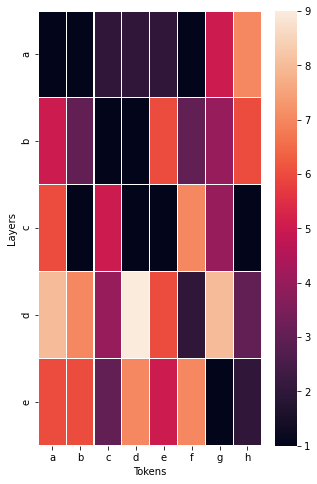

In [10]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(5,8))
xticklabels=names
yticklabels=classes
ax = sns.heatmap(image1, xticklabels=xticklabels, yticklabels=yticklabels, linewidth=0.2)
plt.xlabel('Tokens')
plt.ylabel('Layers')
plt.show()


In [13]:
def gen_IG_visualization(IG_table,Layer_names,Class_labels):
    '''IG_table dimension = #class_label x # Layer_names
    '''
    fig, ax = plt.subplots(figsize=(5,8))
    xticklabels=Layer_names
    yticklabels=Class_labels
    ax = sns.heatmap(IG_table, xticklabels=xticklabels, yticklabels=yticklabels, linewidth=0.2)
    plt.xlabel('Layers')
    plt.ylabel('Class')
    plt.show()

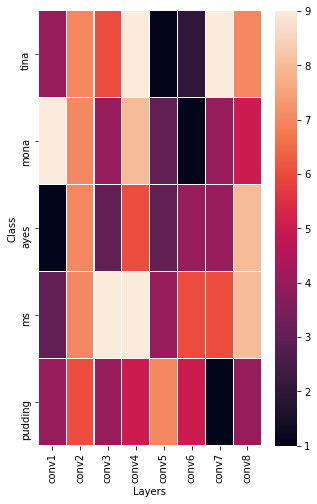

In [14]:
import numpy as np
import matplotlib.pyplot as plt
a = np.random.randint(1,10,size=(5,8))
Layer_names = ['conv1','conv2','conv3','conv4','conv5','conv6','conv7','conv8']
Class_labels = ['tina','mona','ayes','ms','pudding']
gen_IG_visualization(a,Layer_names,Class_labels)

In [29]:
a = np.random.randint(1,10,size=(5,8))
b = np.random.randint(1,10,size=(10,10))
c = np.int(np.round((b.shape[0]*b.shape[1])*9/25))
d = np.int(np.floor((b.shape[0]*b.shape[1])*16/25))
b = b.reshape(c,d)
print(c)

ValueError: cannot reshape array of size 100 into shape (36,64)

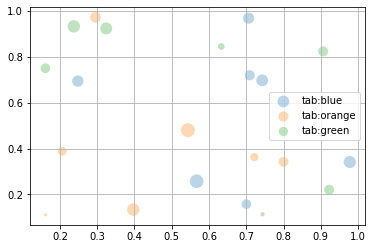

7

In [34]:
import numpy as np
np.random.seed(19680801)
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
for color in ['tab:blue', 'tab:orange', 'tab:green']:
    n = 7
    x, y = np.random.rand(2, n)
    scale = 200.0 * np.random.rand(n)
    ax.scatter(x, y, c=color, s=scale, label=color,
               alpha=0.3, edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()
np.size(x)

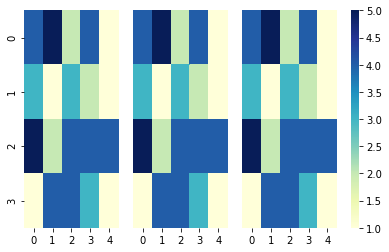

matplotlib.axes._subplots.AxesSubplot

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
a = np.random.randint(1,6,size=(4,5))
fig, (ax1,ax2,ax3,axcb) = plt.subplots(1,4, 
            gridspec_kw={'width_ratios':[1,1,1,0.08]})
ax1.get_shared_y_axes().join(ax2,ax3)
g1 = sns.heatmap(a,cmap="YlGnBu",cbar=False,ax=ax1)
g1.set_ylabel('')
g1.set_xlabel('')
g2 = sns.heatmap(a,cmap="YlGnBu",cbar=False,ax=ax2)
g2.set_ylabel('')
g2.set_xlabel('')
g2.set_yticks([])
g3 = sns.heatmap(a,cmap="YlGnBu",ax=ax3, cbar_ax=axcb)
g3.set_ylabel('')
g3.set_xlabel('')
g3.set_yticks([])
plt.show()
type(g2)

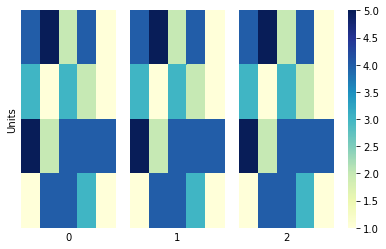

In [82]:
fig_ratio      = np.ones(3)
colorbar_ratio = np.array([0.08])
width_ratios_=np.concatenate((fig_ratio,colorbar_ratio))
fig, ax= plt.subplots(1,4, 
            gridspec_kw={'width_ratios':width_ratios_})

for i in range(3):
    g = sns.heatmap(a,cmap="YlGnBu",cbar=False,ax=ax[i])
    g.set_xlabel(str(i))
    g.set_xticks([])
    g.set_yticks([])
    if i==0:
        g.set_ylabel('Units')

g3 = sns.heatmap(a,cmap="YlGnBu",ax=ax3, cbar_ax=ax[3])
g3.set_ylabel('')
g3.set_xlabel('')
g3.set_yticks([])
plt.show()

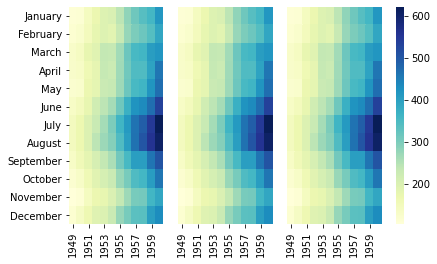

In [46]:
import seaborn  as sns
import matplotlib.pyplot as plt
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
f,(ax1,ax2,ax3, axcb) = plt.subplots(1,4, 
            gridspec_kw={'width_ratios':[1,1,1,0.08]})
ax1.get_shared_y_axes().join(ax2,ax3)
g1 = sns.heatmap(flights,cmap="YlGnBu",cbar=False,ax=ax1)
g1.set_ylabel('')
g1.set_xlabel('')
g2 = sns.heatmap(flights,cmap="YlGnBu",cbar=False,ax=ax2)
g2.set_ylabel('')
g2.set_xlabel('')
g2.set_yticks([])
g3 = sns.heatmap(flights,cmap="YlGnBu",ax=ax3, cbar_ax=axcb)
g3.set_ylabel('')
g3.set_xlabel('')
g3.set_yticks([])

# may be needed to rotate the ticklabels correctly:
for ax in [g1,g2,g3]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=90)
    tly = ax.get_yticklabels()
    ax.set_yticklabels(tly, rotation=0)

plt.show()

In [19]:
def reshape_mat(mat,nrows):
    n_unit   = mat.shape[0]
    padding  = nrows-n_unit%nrows
    temp_mat = np.concatenate((mat,-1*np.ones(padding)))
    new_mat  = temp_mat.reshape(nrows,-1)
    return new_mat

In [21]:
nrows    = 25
top_iou  = np.random.randint(1,6,size=(512))
a = reshape_mat(top_iou,25)
print(a)

[[ 4.  1.  3.  4.  5.  3.  5.  5.  4.  2.  3.  3.  3.  3.  5.  4.  3.  5.
   5.  5.  4.]
 [ 4.  1.  2.  1.  3.  4.  4.  4.  5.  2.  1.  5.  1.  5.  5.  5.  1.  4.
   3.  4.  1.]
 [ 5.  2.  1.  1.  2.  1.  5.  2.  2.  3.  2.  5.  3.  1.  1.  5.  4.  5.
   2.  3.  1.]
 [ 3.  3.  4.  3.  2.  2.  1.  5.  1.  2.  2.  2.  1.  1.  2.  5.  3.  3.
   2.  5.  1.]
 [ 5.  1.  1.  4.  4.  4.  2.  2.  2.  1.  3.  5.  1.  3.  1.  2.  3.  4.
   3.  3.  3.]
 [ 4.  5.  3.  4.  1.  3.  3.  1.  3.  1.  3.  2.  3.  5.  4.  4.  5.  2.
   3.  5.  5.]
 [ 4.  3.  1.  1.  5.  2.  3.  5.  1.  3.  4.  4.  4.  2.  1.  3.  5.  3.
   4.  5.  2.]
 [ 4.  4.  1.  3.  5.  5.  4.  2.  2.  5.  4.  4.  3.  5.  5.  5.  1.  3.
   5.  3.  1.]
 [ 3.  2.  4.  2.  1.  3.  1.  3.  4.  5.  4.  1.  5.  3.  5.  4.  1.  5.
   2.  1.  4.]
 [ 3.  5.  2.  5.  3.  3.  1.  1.  2.  5.  2.  3.  2.  2.  1.  2.  4.  2.
   1.  2.  3.]
 [ 1.  5.  4.  3.  1.  1.  1.  4.  5.  1.  2.  5.  4.  4.  2.  5.  4.  1.
   4.  5.  5.]
 [ 1.  2.  5.  4.  5.